## Final Project - Data Munging/Cleaning

Import packages and load data

In [10]:
import numpy as np
import pandas as pd

import datetime
import os

os.chdir(r"C:\Users\samdk\Desktop\gchool\Data Preparation and Analysis\Assignments\final\data")
df = pd.read_csv('zhvi_state_all.csv')
df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,...,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31
0,9,0,California,state,NaN,186772.968192,187400.767886,188248.451203,190088.518932,192227.320476,...,751354.906647,751202.878739,752677.463191,756518.315395,760983.726603,763443.149254,765429.253511,767189.261797,769474.138978,771056.975268
1,54,1,Texas,state,NaN,110887.540164,110947.799317,110977.025951,111122.080325,111216.019812,...,299670.689394,299931.151038,300801.687085,301655.920193,301986.337013,301755.387552,301196.436997,300782.564919,300524.339692,300267.303477
2,14,2,Florida,state,NaN,106758.239741,106989.488026,107269.807042,107839.623504,108454.109153,...,394437.909498,395163.915513,396026.076149,396704.729732,396828.977415,396044.713789,394990.516491,393976.696636,393122.402319,392175.640399
3,43,3,New York,state,NaN,152527.314229,153070.461297,153593.327941,154717.871951,155881.373013,...,456805.750766,459038.809586,462042.995722,465715.159786,469090.422809,471804.420019,474341.842377,477446.608169,480316.836778,482741.520633
4,47,4,Pennsylvania,state,NaN,98641.752941,98852.740180,99051.011510,99455.058353,99870.115629,...,260859.466055,261695.889129,263028.120511,264708.485625,266204.919350,267095.714371,267435.451681,267687.036035,268076.167619,268823.922103


## Data Cleaning

I'm going to drop some columns, then I want to "Tidy" data. Tidying is structuring the data in a way that makes it easy for a computer to navigate. If you've worked with relational databases, its the structure that exists there. If you want more information on Tidy Data, read this paper (

The rules for tidy data are each row is an observation and each column is a fact about an observation. I'm going to bring in a bunch of data at the **State** level only. I'm also going to pull "size rank" data out and keep in another table that can be joined if necessary.

In [11]:
df = pd.read_csv('zhvi_state_all.csv')
df_region = df[['RegionID', 'SizeRank', 'RegionName', 'RegionType']]
print(df_region.info())
display(df_region.head())
df.drop(columns=['RegionID', 'RegionType', 'StateName', 'SizeRank'], inplace=True)
df_tidy = df.melt(id_vars = ['RegionName'], var_name = 'Date', value_name = 'ZHVI').astype({'Date':'datetime64[ns]'})
print(df_tidy.shape)
print(df_tidy.info())
print(df_tidy.isna().sum())
df_tidy.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   RegionID    51 non-null     int64 
 1   SizeRank    51 non-null     int64 
 2   RegionName  51 non-null     object
 3   RegionType  51 non-null     object
dtypes: int64(2), object(2)
memory usage: 1.7+ KB
None


,RegionID,SizeRank,RegionName,RegionType
0,9,0,California,state
1,54,1,Texas,state
2,14,2,Florida,state
3,43,3,New York,state
4,47,4,Pennsylvania,state


(15198, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15198 entries, 0 to 15197
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   RegionName  15198 non-null  object        
 1   Date        15198 non-null  datetime64[ns]
 2   ZHVI        14970 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 356.3+ KB
None
RegionName      0
Date            0
ZHVI          228
dtype: int64


,RegionName,Date,ZHVI
0,California,2000-01-31,186772.968192
1,Texas,2000-01-31,110887.540164
2,Florida,2000-01-31,106758.239741
3,New York,2000-01-31,152527.314229
4,Pennsylvania,2000-01-31,98641.752941


## Data Cleaning Continued
I now have a bunch of "observations." Categorical data includes the state (currently "RegionName"), Date which has been converted into DateTime. Continuous data includes ZHVI. 

## Some Visuals
I want to graph changes in ZHVI over time for my 5 largest states

In [12]:
#create wide from "tidy" data
df_tidy_2020 = df_tidy.loc[df_tidy['Date'].dt.year >= 2020]
#pull top5 regions
region = df_region.loc[df_region['SizeRank'].isin(range(0,5))]
#do a join
df_final = pd.merge(region, df_tidy_2020, on='RegionName', how='left')
df_final.head()

,RegionID,SizeRank,RegionName,RegionType,Date,ZHVI
0,9,0,California,state,2020-01-31,546309.077136
1,9,0,California,state,2020-02-29,548559.043616
2,9,0,California,state,2020-03-31,550726.780638
3,9,0,California,state,2020-04-30,552728.449163
4,9,0,California,state,2020-05-31,552981.259587


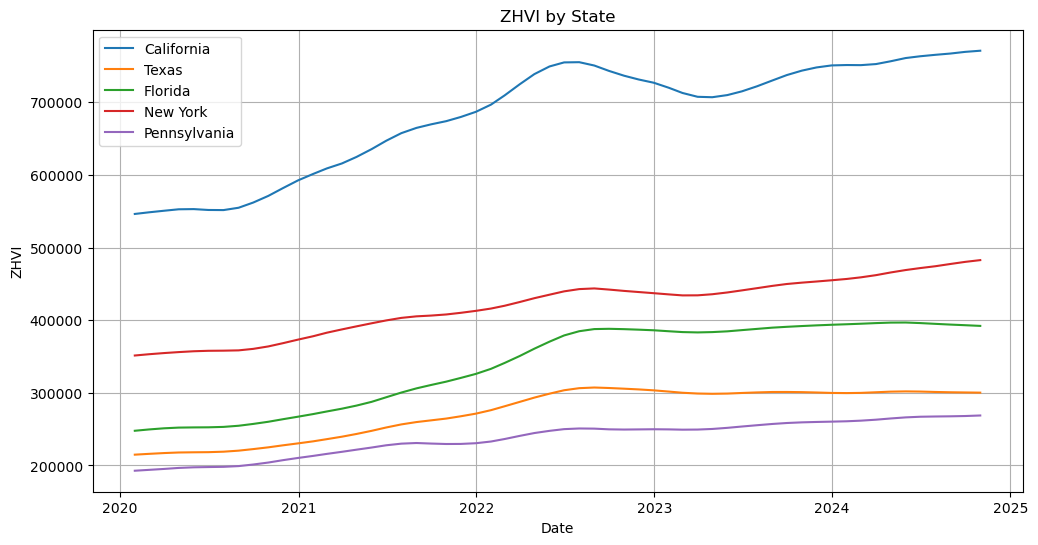

In [13]:
import matplotlib.pyplot as plt

# group by Country and plot each group as a separate line
plt.figure(figsize=(12, 6))
for state in df_final['RegionName'].unique():
    state_df = df_final[df_final['RegionName'] == state]
    plt.plot(state_df['Date'], state_df['ZHVI'], label=state)

# set plot properties
plt.xlabel('Date')
plt.ylabel('ZHVI')
plt.title('ZHVI by State')
plt.legend()
plt.grid(True)

# show plot
plt.show()

# Dive into Data "by Metro"

I'm repeating the above stuff but by metro.

In [16]:
df = pd.read_csv('https://raw.githubusercontent.com/samkrall/dataprepandanalysis/refs/heads/main/zhvi_metro_all.csv')
print(df.shape)
print(df['RegionType'].unique())
df.head()
df.drop(columns=['RegionID', 'RegionType', 'StateName', 'SizeRank'], inplace=True)
df_zhvi = df.melt(id_vars = ['RegionName'], var_name = 'Date', value_name = 'ZHVI').astype({'Date':'datetime64[ns]'})
print(df_zhvi.shape)
print(df_zhvi.info())
print(df_zhvi.isna().sum())
df_zhvi.head()

(895, 303)
['country' 'msa']
(266710, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266710 entries, 0 to 266709
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   RegionName  266710 non-null  object        
 1   Date        266710 non-null  datetime64[ns]
 2   ZHVI        217444 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 6.1+ MB
None
RegionName        0
Date              0
ZHVI          49266
dtype: int64


,RegionName,Date,ZHVI
0,United States,2000-01-31,121618.117906
1,"New York, NY",2000-01-31,216209.133034
2,"Los Angeles, CA",2000-01-31,220054.246992
3,"Chicago, IL",2000-01-31,152313.404618
4,"Dallas, TX",2000-01-31,124931.823275


# Inventory Analysis

Inventory is the amount of homes on the market. I'm pulling inventory data and "tidying" it so that it can be easily joined to ZHVI data. 

In [17]:
df = pd.read_csv('https://raw.githubusercontent.com/samkrall/dataprepandanalysis/refs/heads/main/inventory_monthly_all.csv')
print(df.shape)
print(df['RegionType'].unique())
display(df.head())
df.drop(columns=['RegionID', 'RegionType', 'StateName', 'SizeRank'], inplace=True)
df_inventory = df.melt(id_vars = ['RegionName'], var_name = 'Date', value_name = 'Inventory').astype({'Date':'datetime64[ns]'})
print(df_inventory.shape)
print(df_inventory.info())
print(df_inventory.isna().sum())
df_inventory.head()

(928, 85)
['country' 'msa']


,RegionID,SizeRank,RegionName,RegionType,StateName,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,...,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31
0,102001,0,United States,country,NaN,1421530.0,1500196.0,1592417.0,1660615.0,1709144.0,...,890491.0,876361.0,913841.0,967480.0,1036855.0,1101144.0,1149668.0,1173406.0,1180162.0,1181190.0
1,394913,1,"New York, NY",msa,NY,73707.0,80345.0,85864.0,90067.0,91881.0,...,36461.0,34858.0,36244.0,38666.0,41641.0,43847.0,44838.0,43767.0,42694.0,41774.0
2,753899,2,"Los Angeles, CA",msa,CA,21998.0,23784.0,25605.0,27109.0,28811.0,...,14058.0,13754.0,14572.0,15567.0,16977.0,18457.0,19823.0,20703.0,21328.0,21589.0
3,394463,3,"Chicago, IL",msa,IL,38581.0,42253.0,45757.0,47492.0,48984.0,...,19092.0,18342.0,19059.0,20389.0,21782.0,23134.0,24180.0,24779.0,25144.0,25409.0
4,394514,4,"Dallas, TX",msa,TX,24043.0,25876.0,28225.0,30490.0,32408.0,...,21664.0,21401.0,22537.0,24388.0,26468.0,28696.0,30378.0,31631.0,31774.0,31776.0


(74240, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74240 entries, 0 to 74239
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   RegionName  74240 non-null  object        
 1   Date        74240 non-null  datetime64[ns]
 2   Inventory   73049 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 1.7+ MB
None
RegionName       0
Date             0
Inventory     1191
dtype: int64


,RegionName,Date,Inventory
0,United States,2018-03-31,1421530.0
1,"New York, NY",2018-03-31,73707.0
2,"Los Angeles, CA",2018-03-31,21998.0
3,"Chicago, IL",2018-03-31,38581.0
4,"Dallas, TX",2018-03-31,24043.0


# Pending
I'm doing the same with median days to pending data. I'm choosing median as a better gauge than average, average can be more easily effectly by outliers.

In [18]:
df = pd.read_csv('https://raw.githubusercontent.com/samkrall/dataprepandanalysis/refs/heads/main/median_days_to_pending.csv')
print(df.shape)
print(df['RegionType'].unique())
display(df.head())
df.drop(columns=['RegionID', 'RegionType', 'StateName', 'SizeRank'], inplace=True)
df_pending = df.melt(id_vars = ['RegionName'], var_name = 'Date', value_name = 'Med_Pending').astype({'Date':'datetime64[ns]'})
print(df_pending.shape)
print(df_pending.info())
print(df_pending.isna().sum())
df_pending.head()

(726, 85)
['country' 'msa']


,RegionID,SizeRank,RegionName,RegionType,StateName,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,...,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31
0,102001,0,United States,country,NaN,31.0,21.0,19.0,18.0,20.0,...,27.0,25.0,20.0,14.0,13.0,14.0,15.0,18.0,20.0,21.0
1,394913,1,"New York, NY",msa,NY,58.0,43.0,38.0,40.0,43.0,...,37.0,36.0,30.0,23.0,21.0,22.0,24.0,26.0,28.0,28.0
2,753899,2,"Los Angeles, CA",msa,CA,17.0,14.0,15.0,15.0,17.0,...,19.0,18.0,15.0,13.0,13.0,14.0,15.0,16.0,18.0,20.0
3,394463,3,"Chicago, IL",msa,IL,32.0,17.0,15.0,16.0,18.0,...,18.0,17.0,12.0,7.0,7.0,7.0,8.0,9.0,11.0,13.0
4,394514,4,"Dallas, TX",msa,TX,27.0,21.0,20.0,20.0,22.0,...,32.0,29.0,23.0,16.0,15.0,17.0,20.0,25.0,30.0,33.0


(58080, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58080 entries, 0 to 58079
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   RegionName   58080 non-null  object        
 1   Date         58080 non-null  datetime64[ns]
 2   Med_Pending  40395 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 1.3+ MB
None
RegionName         0
Date               0
Med_Pending    17685
dtype: int64


,RegionName,Date,Med_Pending
0,United States,2018-03-31,31.0
1,"New York, NY",2018-03-31,58.0
2,"Los Angeles, CA",2018-03-31,17.0
3,"Chicago, IL",2018-03-31,32.0
4,"Dallas, TX",2018-03-31,27.0


# Close
I'm doing the same thing with median days to close. Tidying data, changing Date to datetime, melting the data. All of this is to make it easy to do a join (merge in python) and combine data together.

In [19]:
df = pd.read_csv('https://raw.githubusercontent.com/samkrall/dataprepandanalysis/refs/heads/main/median_days_to_close.csv')
print(df.shape)
print(df['RegionType'].unique())
display(df.head())
df.drop(columns=['RegionID', 'RegionType', 'StateName', 'SizeRank'], inplace=True)
df_close = df.melt(id_vars = ['RegionName'], var_name = 'Date', value_name = 'Med_Close').astype({'Date':'datetime64[ns]'})
print(df_close.shape)
print(df_close.info())
print(df_close.isna().sum())
df_close.head()

(623, 86)
['country' 'msa']


,RegionID,SizeRank,RegionName,RegionType,StateName,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,...,2023-12-31,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30
0,102001,0,United States,country,NaN,35.0,31.0,31.0,32.0,33.0,...,30.0,32.0,29.0,29.0,31.0,30.0,31.0,31.0,30.0,31.0
1,394913,1,"New York, NY",msa,NY,60.0,56.0,49.0,47.0,47.0,...,49.0,55.0,51.0,46.0,48.0,50.0,52.0,53.0,51.0,51.0
2,753899,2,"Los Angeles, CA",msa,CA,35.0,29.0,30.0,30.0,31.0,...,28.0,29.0,27.0,27.0,28.0,28.0,28.0,28.0,27.0,28.0
3,394463,3,"Chicago, IL",msa,IL,42.0,39.0,39.0,41.0,43.0,...,34.0,37.0,32.0,32.0,35.0,35.0,35.0,35.0,33.0,34.0
4,394514,4,"Dallas, TX",msa,TX,20.0,20.0,19.0,20.0,21.0,...,27.0,28.0,27.0,27.0,28.0,28.0,28.0,28.0,27.0,28.0


(50463, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50463 entries, 0 to 50462
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   RegionName  50463 non-null  object        
 1   Date        50463 non-null  datetime64[ns]
 2   Med_Close   35378 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 1.2+ MB
None
RegionName        0
Date              0
Med_Close     15085
dtype: int64


,RegionName,Date,Med_Close
0,United States,2018-01-31,35.0
1,"New York, NY",2018-01-31,60.0
2,"Los Angeles, CA",2018-01-31,35.0
3,"Chicago, IL",2018-01-31,42.0
4,"Dallas, TX",2018-01-31,20.0


# Market Heat Index
Heat index data

In [21]:
df = pd.read_csv('https://raw.githubusercontent.com/samkrall/dataprepandanalysis/refs/heads/main/market_heat_index.csv')
print(df.shape)
print(df['RegionType'].unique())
display(df.head())
df.drop(columns=['RegionID', 'RegionType', 'StateName', 'SizeRank'], inplace=True)
df_mhi = df.melt(id_vars = ['RegionName'], var_name = 'Date', value_name = 'MHI').astype({'Date':'datetime64[ns]'})
print(df_mhi.shape)
print(df_mhi.info())
print(df_mhi.isna().sum())
df_mhi.head()

(928, 87)
['country' 'msa']


,RegionID,SizeRank,RegionName,RegionType,StateName,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,...,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31
0,102001,0,United States,country,NaN,49.0,50.0,52.0,54.0,55.0,...,59.0,63.0,63.0,62.0,59.0,57.0,55.0,53.0,52.0,50.0
1,394913,1,"New York, NY",msa,NY,52.0,52.0,55.0,56.0,55.0,...,85.0,91.0,89.0,86.0,81.0,77.0,76.0,76.0,73.0,69.0
2,753899,2,"Los Angeles, CA",msa,CA,68.0,66.0,65.0,66.0,66.0,...,81.0,84.0,83.0,80.0,74.0,70.0,67.0,65.0,62.0,61.0
3,394463,3,"Chicago, IL",msa,IL,48.0,49.0,51.0,52.0,51.0,...,68.0,74.0,76.0,75.0,71.0,67.0,64.0,61.0,58.0,56.0
4,394514,4,"Dallas, TX",msa,TX,55.0,55.0,58.0,60.0,59.0,...,66.0,67.0,67.0,65.0,59.0,55.0,51.0,49.0,48.0,48.0


(76096, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76096 entries, 0 to 76095
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   RegionName  76096 non-null  object        
 1   Date        76096 non-null  datetime64[ns]
 2   MHI         73884 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 1.7+ MB
None
RegionName       0
Date             0
MHI           2212
dtype: int64


,RegionName,Date,MHI
0,United States,2018-01-31,49.0
1,"New York, NY",2018-01-31,52.0
2,"Los Angeles, CA",2018-01-31,68.0
3,"Chicago, IL",2018-01-31,48.0
4,"Dallas, TX",2018-01-31,55.0


# Joining the Data
Joining the data together using the merge function on "date" and "regionname".

In [22]:
df_joined = pd.merge(df_zhvi, df_inventory, on=['Date', 'RegionName'])
df_joined = pd.merge(df_joined, df_pending, on=['Date', 'RegionName'])
df_joined = pd.merge(df_joined, df_close, on=['Date', 'RegionName'])
df_joined = pd.merge(df_joined, df_mhi, on=['Date', 'RegionName'])
print(df_joined.shape)
print(df_joined.info())
print(df_joined['Date'].unique())
df_joined.head()

(47874, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47874 entries, 0 to 47873
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   RegionName   47874 non-null  object        
 1   Date         47874 non-null  datetime64[ns]
 2   ZHVI         47859 non-null  float64       
 3   Inventory    47850 non-null  float64       
 4   Med_Pending  37097 non-null  float64       
 5   Med_Close    34373 non-null  float64       
 6   MHI          47725 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 2.6+ MB
None
<DatetimeArray>
['2018-03-31 00:00:00', '2018-04-30 00:00:00', '2018-05-31 00:00:00',
 '2018-06-30 00:00:00', '2018-07-31 00:00:00', '2018-08-31 00:00:00',
 '2018-09-30 00:00:00', '2018-10-31 00:00:00', '2018-11-30 00:00:00',
 '2018-12-31 00:00:00', '2019-01-31 00:00:00', '2019-02-28 00:00:00',
 '2019-03-31 00:00:00', '2019-04-30 00:00:00', '2019-05-31 00:00:00'

,RegionName,Date,ZHVI,Inventory,Med_Pending,Med_Close,MHI
0,United States,2018-03-31,224910.290091,1421530.0,31.0,31.0,52.0
1,"New York, NY",2018-03-31,469485.036979,73707.0,58.0,49.0,55.0
2,"Los Angeles, CA",2018-03-31,611069.355510,21998.0,17.0,30.0,65.0
3,"Chicago, IL",2018-03-31,228502.138052,38581.0,32.0,39.0,51.0
4,"Dallas, TX",2018-03-31,237191.560781,24043.0,27.0,19.0,58.0


# ZHVI Forward Growth Rate
I want to create a new column, a 1 year growth rate for ZHVI. This is forward looking, meaning its how much the ZHVI in a particular area will grow from the current date to 1 year in the future. To do this I'm going to group the columns together 

In [23]:
def calculate_grouped_annual_growth_rate(df, value_column='ZHVI', group_column='RegionName'):
    df.set_index('Date', inplace=True)
    # Create a function to calculate growth rate for each group
    def calculate_group_growth_rate(group):
        group[f'{value_column}_forward_annual_growth_rate'] = (
            group[value_column].shift(-12) / group[value_column] - 1
        ) * 100
        return group
    
    # Apply the growth rate calculation to each group
    df_with_growth = df.groupby(group_column, group_keys=True).apply(calculate_group_growth_rate)
    
    return df_with_growth

df_final2 = calculate_grouped_annual_growth_rate(df_joined)
print(df_final2.info())
df_final2.head()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 47874 entries, ('Aberdeen, WA', Timestamp('2018-03-31 00:00:00')) to ('Zanesville, OH', Timestamp('2024-09-30 00:00:00'))
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   RegionName                       47874 non-null  object 
 1   ZHVI                             47859 non-null  float64
 2   Inventory                        47850 non-null  float64
 3   Med_Pending                      37097 non-null  float64
 4   Med_Close                        34373 non-null  float64
 5   MHI                              47725 non-null  float64
 6   ZHVI_forward_annual_growth_rate  40576 non-null  float64
dtypes: float64(6), object(1)
memory usage: 2.7+ MB
None


RegionName           ZHVI  Inventory  Med_Pending  \
RegionName   Date                                                              
Aberdeen, WA 2018-03-31  Aberdeen, WA  174903.987718      501.0         49.0   
             2018-04-30  Aberdeen, WA  177014.126206      523.0         37.0   
             2018-05-31  Aberdeen, WA  178746.638772      563.0         20.0   
             2018-06-30  Aberdeen, WA  179913.757230      592.0         20.0   
             2018-07-31  Aberdeen, WA  181769.302747      625.0         21.0   

                         Med_Close   MHI  ZHVI_forward_annual_growth_rate  
RegionName   Date                                                          
Aberdeen, WA 2018-03-31       38.0  53.0                        12.707249  
             2018-04-30       36.0  60.0                        12.423186  
             2018-05-31       34.0  63.0                        12.206930  
             2018-06-30       37.0  60.0                        12.205142  
             2018-07-31       31.0  59.0                        11.897251

# Final Cleaning
Drop Na Values

In [24]:
df_final2.dropna(how='any', inplace=True)
print(df_final2.shape)
print(df_final2.info())
df_final2.head()

(27174, 7)
<class 'pandas.core.frame.DataFrame'>
MultiIndex: 27174 entries, ('Aberdeen, WA', Timestamp('2018-03-31 00:00:00')) to ('Zanesville, OH', Timestamp('2023-09-30 00:00:00'))
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   RegionName                       27174 non-null  object 
 1   ZHVI                             27174 non-null  float64
 2   Inventory                        27174 non-null  float64
 3   Med_Pending                      27174 non-null  float64
 4   Med_Close                        27174 non-null  float64
 5   MHI                              27174 non-null  float64
 6   ZHVI_forward_annual_growth_rate  27174 non-null  float64
dtypes: float64(6), object(1)
memory usage: 1.6+ MB
None


RegionName           ZHVI  Inventory  Med_Pending  \
RegionName   Date                                                              
Aberdeen, WA 2018-03-31  Aberdeen, WA  174903.987718      501.0         49.0   
             2018-04-30  Aberdeen, WA  177014.126206      523.0         37.0   
             2018-05-31  Aberdeen, WA  178746.638772      563.0         20.0   
             2018-06-30  Aberdeen, WA  179913.757230      592.0         20.0   
             2018-07-31  Aberdeen, WA  181769.302747      625.0         21.0   

                         Med_Close   MHI  ZHVI_forward_annual_growth_rate  
RegionName   Date                                                          
Aberdeen, WA 2018-03-31       38.0  53.0                        12.707249  
             2018-04-30       36.0  60.0                        12.423186  
             2018-05-31       34.0  63.0                        12.206930  
             2018-06-30       37.0  60.0                        12.205142  
             2018-07-31       31.0  59.0                        11.897251

# Heatmap Visualization

I'm creating correlation matrix and a heatmap off of it. I want to see which of the various variables is best correlated with the "forward annual growth rate." I'll use this to determine where to invest.

<Axes: >

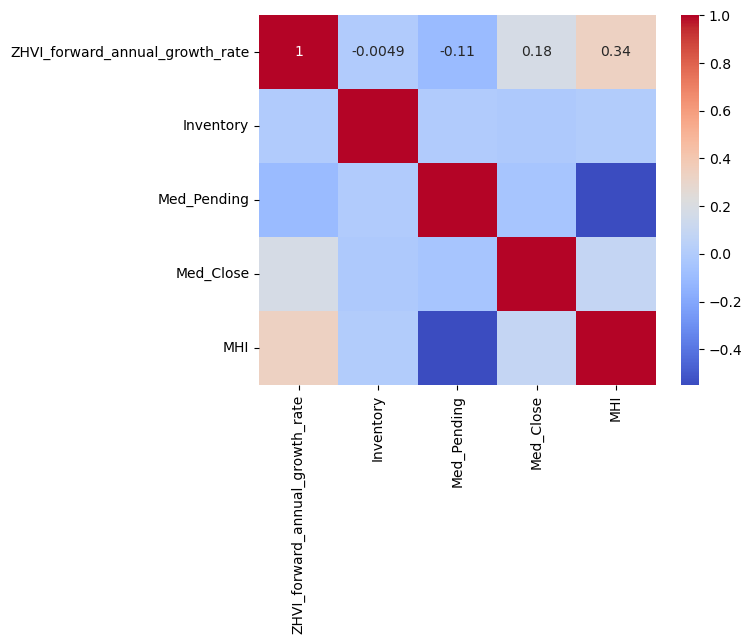

In [26]:
import seaborn as sns
df_final3_heat = df_final2[['ZHVI_forward_annual_growth_rate', 'Inventory', 'Med_Pending', 'Med_Close', 'MHI']]
correlation_matrix = df_final3_heat.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')


# Data Analysis
Its looking ike the Heat Index data is best correlated with yearly price growth. The correlation isn't great but it exists. So what I'm going to do is look for areas with a high "heat index" value and invest in those areas.

In [28]:
print(df_joined.index.max())
sorted_final_df = df_joined.loc[df_joined.index == df_joined.index.max()].sort_values(by='MHI', ascending=False)
display(sorted_final_df.head(10))
print(sorted_final_df['RegionName'][:4].tolist())


2024-09-30 00:00:00


,RegionName,ZHVI,Inventory,Med_Pending,Med_Close,MHI
Date,,,,,,
2024-09-30,"Rochester, NY",2.519543e+05,1748.0,8.0,45.0,134.0
2024-09-30,"Syracuse, NY",2.353124e+05,1218.0,7.0,63.0,86.0
2024-09-30,"Baraboo, WI",3.113336e+05,230.0,16.0,27.0,85.0
2024-09-30,"San Jose, CA",1.567816e+06,2483.0,13.0,24.0,82.0
2024-09-30,"Hartford, CT",3.594216e+05,2073.0,7.0,37.0,82.0
2024-09-30,"Buffalo, NY",2.610560e+05,2157.0,12.0,59.0,82.0
2024-09-30,"Batavia, NY",2.059875e+05,88.0,14.0,49.0,80.0
2024-09-30,"Parkersburg, WV",1.637072e+05,233.0,14.0,33.0,79.0
2024-09-30,"Dixon, IL",1.606787e+05,70.0,14.0,41.0,79.0


['Rochester, NY', 'Syracuse, NY', 'Baraboo, WI', 'San Jose, CA']


# Conclusion
There's a ton more that could be done here. I'm trying not to stray into machine learning because it's beyond the scope of the course. The process is basically to tidy the data, join a bunch of the different types of data together on RegionName and Date and then look for patterns. We can join more of the geographical data in and do a bunch of categorical vs. numeric graphing based on that. 

## Additional Tweaks
-Filling instead of dropping data

-Removing outliers

-Normalizing (0-1) or transformaing (logarithmically) data

-Probably a bunch of others